In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')

NameError: ignored

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
os.listdir()

['kaggle.json',
 'fruit-and-vegetable-image-recognition.zip',
 'test',
 'train',
 'validation']

In [ ]:
!unzip -q '/content/drive/MyDrive/kaggle/fruit-and-vegetable-image-recognition.zip'

replace test/apple/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test/apple/Image_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
os.listdir()

['kaggle.json',
 'fruit-and-vegetable-image-recognition.zip',
 'test',
 'train',
 'validation']

In [2]:
from tensorflow import keras
from keras import layers
inputs = keras.Input(shape=(100, 100, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(36, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856 

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [5]:
new_base_dir = '/content/drive/MyDrive/kaggle'

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir +"/train",
    image_size=(100, 100),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir + "/validation",
    image_size=(100, 100),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir +"/test",
    image_size=(100, 100),
    batch_size=32)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [7]:
classes = train_dataset.class_names
print(classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


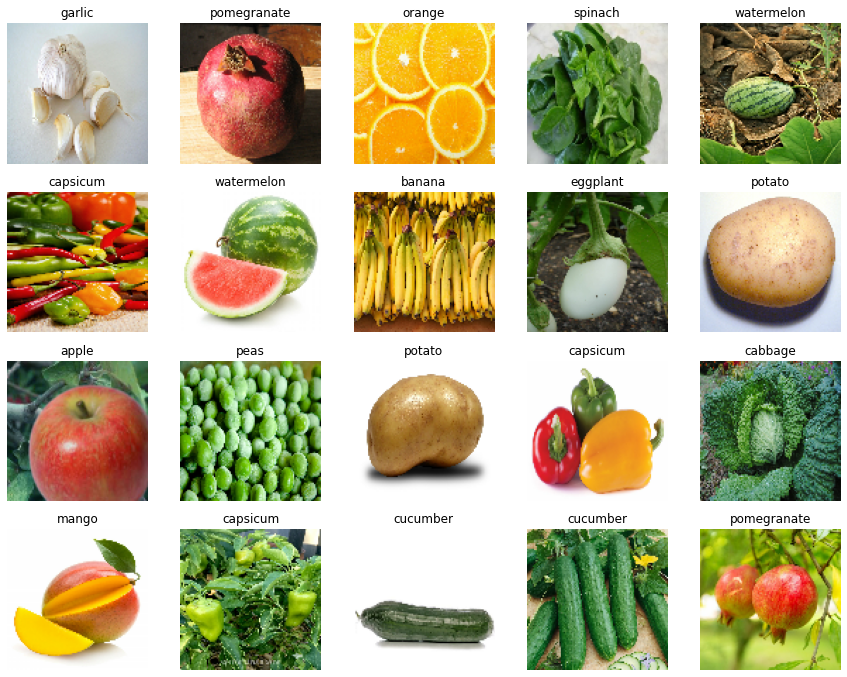

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
  for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

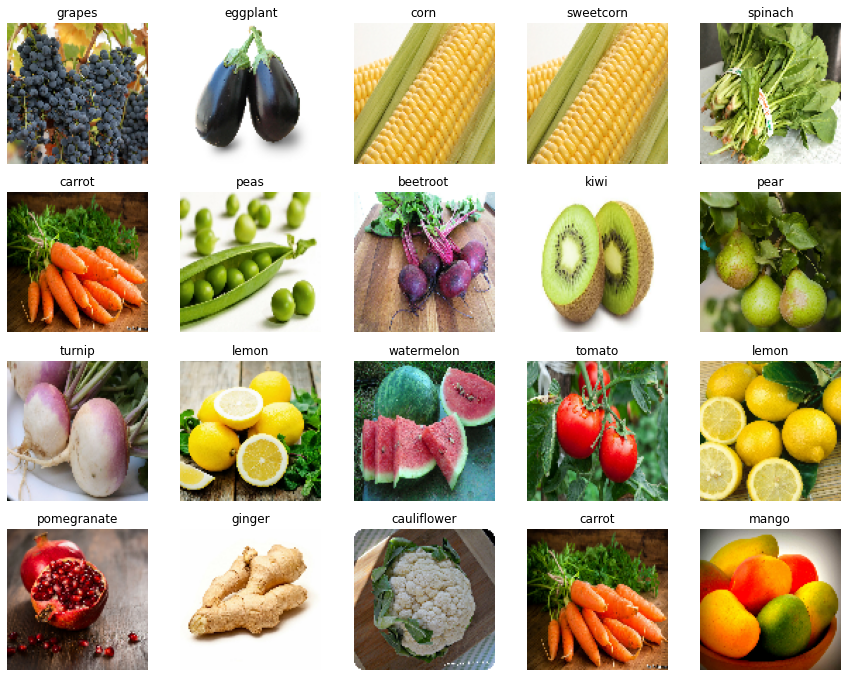

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
  for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [8]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 100, 100, 3)
labels batch shape: (32,)


In [9]:
from tensorflow import keras
from keras import layers
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
98/98 [==============================] - 455s 5s/step - loss: 19.9478 - accuracy: 0.0411 - val_loss: 12.2842 - val_accuracy: 0.0285
Epoch 2/30
98/98 [==============================] - 121s 1s/step - loss: 7.4488 - accuracy: 0.0722 - val_loss: 34.5546 - val_accuracy: 0.0313
Epoch 3/30
98/98 [==============================] - 119s 1s/step - loss: 6.6334 - accuracy: 0.1364 - val_loss: 3.1957 - val_accuracy: 0.2137
Epoch 4/30
98/98 [==============================] - 123s 1s/step - loss: 4.7984 - accuracy: 0.2058 - val_loss: 10.5762 - val_accuracy: 0.1738
Epoch 5/30
98/98 [==============================] - 123s 1s/step - loss: 4.4366 - accuracy: 0.3088 - val_loss: 7.4660 - val_accuracy: 0.2080
Epoch 6/30
98/98 [==============================] - 121s 1s/step - loss: 2.3521 - accuracy: 0.5146 - val_loss: 3.3172 - val_accuracy: 0.5128
Epoch 7/30
98/98 [==============================] - 120s 1s/step - loss: 1.6987 - accuracy: 0.7018 - val_loss: 1.2688 - val_accuracy: 0.9117
Epoch 8/3

In [10]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)

12/12 [==============================] - 54s 954ms/step - loss: 1.2493 - accuracy: 0.9136


In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/kaggle'

In [11]:
import pickle
file_name='fruits_and_vegetables.pkl'
f = open(file_name,'wb')
pickle.dump(model,f)
f.close()

INFO:tensorflow:Assets written to: ram://d75fa828-b03c-4c5f-bafc-1e24cd1fa843/assets


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

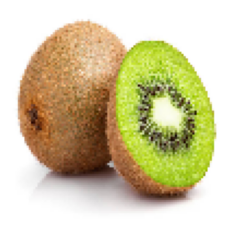

In [ ]:

img =  tf.keras.preprocessing.image.load_img('/content/kiwi.jpg', target_size=(100, 100))
img_tensor =  tf.keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()


In [ ]:
pred = model.predict(img_tensor)
print(pred)

[[0.02516229 0.02671262 0.02622259 0.02551544 0.02855535 0.02489907
  0.03172857 0.02966703 0.02811866 0.03091222 0.02713777 0.0223477
  0.02740926 0.0278242  0.02741828 0.02668279 0.029605   0.0276508
  0.02697676 0.02815794 0.02900412 0.02747048 0.02606879 0.02784673
  0.03025559 0.0299135  0.0238941  0.03027307 0.02853181 0.03302281
  0.02706413 0.02912927 0.0265303  0.02700415 0.02679187 0.02849494]]


In [ ]:
max_val = np.max(pred[0])
print(max_val)
max_index = np.where(pred[0] == max_val)
max_index = max_index[0][0]
print(max_index)
print('the predicted value is : ' + classes[max_index])

0.033022813
29
the predicted value is : soy beans


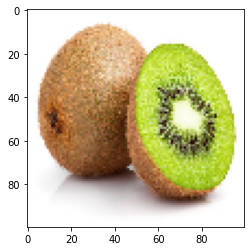

Actual: kiwi
Predicted: kiwi


In [ ]:
from keras_preprocessing import image
image_path="/content/kiwi.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: kiwi")
print("Predicted: "+classes[np.argmax(pred)])

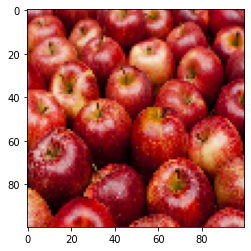

Actual: Apple
Predicted: raddish


In [ ]:
from keras_preprocessing import image
image_path="/content/apple2.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: Apple")
print("Predicted: "+classes[np.argmax(pred)])

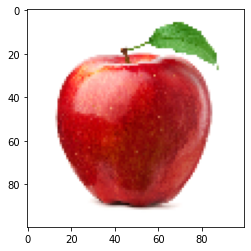

Actual: Apple
Predicted: apple


In [ ]:
from keras_preprocessing import image
image_path="/content/apple.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: Apple")
print("Predicted: "+classes[np.argmax(pred)])

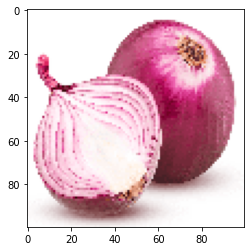

Actual: Onion
Predicted: onion


In [ ]:
from keras_preprocessing import image
image_path="/content/onion2.png"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: Onion")
print("Predicted: "+classes[np.argmax(pred)])

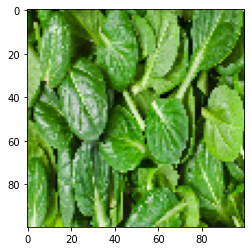

Actual: spinach
Predicted: chilli pepper


In [ ]:
from keras_preprocessing import image
image_path="/content/spinach1.png"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: spinach")
print("Predicted: "+classes[np.argmax(pred)])

In [ ]:
new_base_dir = '/content/drive/MyDrive/kaggle'

In [ ]:
import pickle
infile = open('fruits_and_vegetables.pkl','rb')
model = pickle.load(infile)
infile.close()

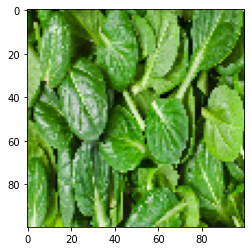

[[1.72761501e-23 9.09455902e-23 1.47189461e-17 6.77997479e-04
  1.85051441e-08 4.32100554e-04 7.38095857e-27 1.32201943e-22
  9.97916162e-01 1.89549288e-12 2.27565542e-04 7.11224205e-11
  2.21144107e-23 4.42251447e-26 1.13815602e-17 1.42550358e-04
  2.33941697e-04 3.90563731e-20 2.02945259e-04 1.02421522e-22
  5.69562997e-26 1.12380179e-18 1.02457475e-22 2.75276935e-09
  2.51881374e-05 8.90066721e-17 7.77441779e-16 2.50069272e-18
  1.06092175e-11 3.68524953e-13 1.41492827e-04 9.01523966e-18
  3.40032290e-29 2.31503485e-15 1.87962319e-12 5.62476458e-19]]


In [ ]:
from keras_preprocessing import image
image_path="/content/spinach1.png"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)

In [ ]:
label = np.argmax(pred, axis=1)
print("Actual: spinach")
print("Predicted: "+classes[np.argmax(pred)])

In [ ]:
max_val = np.max(pred[0])
print(max_val)
max_index = np.where(pred[0] == max_val)
max_index = max_index[0][0]
print(max_index)
print('the predicted value is : ' + classes[max_index])

0.99791616
8
the predicted value is : chilli pepper


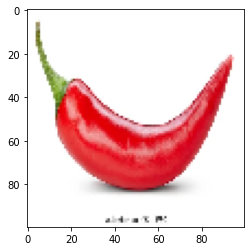

[[5.90214177e-06 5.17646663e-16 2.57937671e-08 2.06493045e-10
  2.37486758e-28 1.03443235e-13 1.03566633e-09 4.46162570e-24
  9.99904752e-01 2.76801406e-25 5.25718839e-21 5.31295833e-19
  4.77302853e-22 1.25290301e-24 3.11592192e-21 1.57365631e-11
  2.02277261e-20 5.15992934e-22 4.55811621e-25 7.52602009e-18
  1.33567415e-08 7.03015426e-19 1.63737663e-08 2.08247461e-26
  2.22817722e-26 1.03698626e-25 6.99367508e-10 4.86990439e-12
  3.24805296e-06 1.75838898e-26 1.71739969e-27 2.70045615e-28
  9.85639645e-07 2.13849466e-06 1.62738177e-16 8.29505225e-05]]


In [ ]:
from keras_preprocessing import image
image_path="/content/chilli.png"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)

In [ ]:
label = np.argmax(pred, axis=1)
print("Actual: chilli pepper")
print("Predicted: "+classes[np.argmax(pred)])

Actual: spinach
Predicted: chilli pepper


In [ ]:
max_val = np.max(pred[0])
print(max_val)
max_index = np.where(pred[0] == max_val)
max_index = max_index[0][0]
print(max_index)
print('the predicted value is : ' + classes[max_index])

0.99990475
8
the predicted value is : chilli pepper


In [ ]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

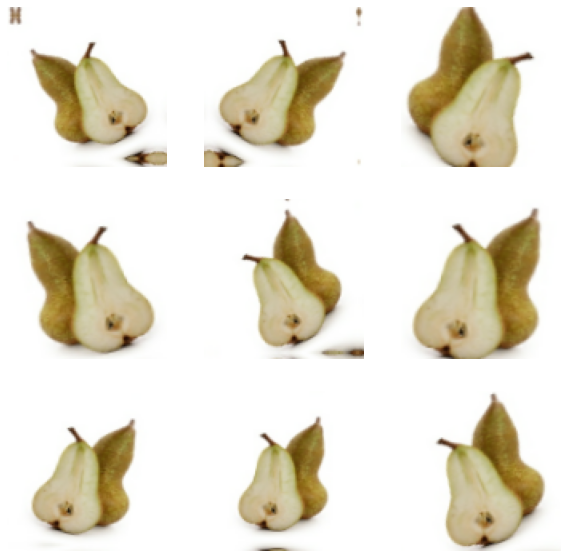

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(36, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
98/98 [==============================] - 138s 1s/step - loss: 1.3785 - accuracy: 0.5660 - val_loss: 1.4014 - val_accuracy: 0.5897
Epoch 2/50
98/98 [==============================] - 138s 1s/step - loss: 1.3366 - accuracy: 0.5884 - val_loss: 2.3043 - val_accuracy: 0.3960
Epoch 3/50
98/98 [==============================] - 142s 1s/step - loss: 1.2955 - accuracy: 0.6055 - val_loss: 1.3188 - val_accuracy: 0.6239
Epoch 4/50
98/98 [==============================] - 137s 1s/step - loss: 1.3069 - accuracy: 0.5974 - val_loss: 1.2665 - val_accuracy: 0.6895
Epoch 5/50
98/98 [==============================] - 138s 1s/step - loss: 1.2482 - accuracy: 0.6074 - val_loss: 0.8826 - val_accuracy: 0.7379
Epoch 6/50
98/98 [==============================] - 137s 1s/step - loss: 1.2016 - accuracy: 0.6260 - val_loss: 0.8251 - val_accuracy: 0.7521
Epoch 7/50
98/98 [==============================] - 144s 1s/step - loss: 1.1841 - accuracy: 0.6273 - val_loss: 1.6227 - val_accuracy: 0.5385
Epoch 8/50
98

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

12/12 [==============================] - 16s 423ms/step - loss: 0.4682 - accuracy: 0.8774
Test accuracy: 0.877


In [ ]:
import pickle
file_name='augmentation.pkl'
f = open(file_name,'wb')
pickle.dump(model,f)
f.close()

INFO:tensorflow:Assets written to: ram://232b6dea-82c8-4ae4-8c5d-2b46aa101614/assets


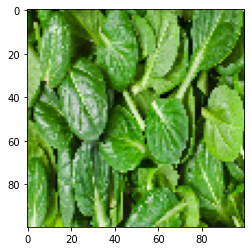

[[3.3001709e-03 1.6417246e-03 3.8540081e-04 1.8518157e-02 1.4775727e-03
  7.0220381e-03 2.5849613e-05 2.3485815e-04 1.9521112e-02 5.3608813e-03
  1.1280797e-02 1.9230625e-03 4.1995995e-04 7.3586110e-05 3.2771286e-03
  1.2311289e-01 2.7585453e-03 4.3438317e-04 7.1733154e-02 1.1034650e-03
  8.5940024e-05 3.5942307e-05 1.3737205e-03 6.6222419e-05 5.8605564e-01
  1.8475868e-04 4.6979130e-04 2.2274027e-05 4.7762698e-04 3.3852238e-02
  9.7014412e-02 1.4786744e-04 8.6533673e-06 2.3775953e-03 1.6048983e-03
  2.6177228e-03]]


In [ ]:
from keras_preprocessing import image
image_path="/content/spinach1.png"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)

In [ ]:
label = np.argmax(pred, axis=1)
print("Actual: spinach")
print("Predicted: "+classes[np.argmax(pred)])

Actual: spinach
Predicted: peas


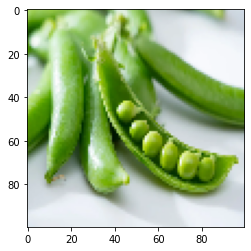

[[1.4334967e-05 4.7737994e-05 6.2196500e-07 3.7254998e-04 4.9625437e-06
  2.2058925e-04 5.7149357e-10 2.7985022e-06 8.1523950e-04 1.9947773e-05
  1.1606043e-03 7.8920406e-05 7.7409559e-06 4.4938380e-07 2.2458697e-04
  2.1108942e-02 4.6840898e-04 6.6667735e-06 2.8056551e-03 2.3227951e-05
  2.3600511e-07 9.4536468e-09 2.2387228e-06 4.1918267e-07 9.4606829e-01
  9.3475052e-08 1.3467520e-07 2.0609589e-08 2.8365389e-06 1.4805412e-02
  1.1721185e-02 5.1818528e-08 7.9147078e-10 4.9034719e-07 8.6530881e-06
  5.8444507e-06]]
Actual: peas
Predicted: peas


In [ ]:
from keras_preprocessing import image
image_path="/content/peas1.png"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: peas")
print("Predicted: "+classes[np.argmax(pred)])

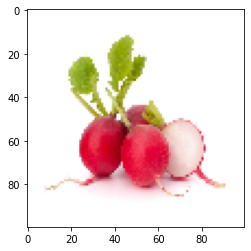

[[4.84439659e-12 0.00000000e+00 9.74134684e-01 5.77185642e-19
  4.83475679e-28 2.74599781e-15 8.27124530e-18 6.19809430e-32
  3.39027006e-09 2.36052454e-38 3.04939878e-25 3.32732981e-20
  2.35146122e-19 7.54799469e-33 1.08123522e-21 2.14390375e-14
  1.06038295e-36 0.00000000e+00 3.18995457e-19 5.19565675e-33
  6.88062400e-13 0.00000000e+00 3.83133053e-10 6.04860551e-32
  1.89206362e-26 6.15825497e-20 2.20139046e-10 0.00000000e+00
  2.58653108e-02 7.70345502e-38 2.94625109e-22 0.00000000e+00
  1.10118197e-21 1.68983436e-12 6.40020675e-11 1.88246693e-11]]
Actual: peas
Predicted: beetroot


In [ ]:
from keras_preprocessing import image
image_path="/content/raddish.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: peas")
print("Predicted: "+classes[np.argmax(pred)])

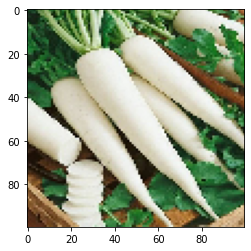

[[5.2965344e-05 1.0109510e-03 2.6744763e-07 9.3829328e-08 1.0476606e-07
  5.4833168e-07 6.4781153e-07 5.8149588e-03 5.7948316e-08 1.0282297e-06
  7.8057066e-10 3.5927957e-04 9.8647112e-01 5.9191935e-04 7.2677096e-08
  1.0957631e-07 2.7120281e-08 2.6349744e-05 1.1031778e-08 9.8055625e-07
  5.8286253e-04 4.5846292e-07 8.3685782e-06 8.7157487e-06 3.9169880e-08
  1.4269376e-08 1.0705426e-08 5.5386033e-04 2.5664521e-03 3.2894750e-08
  8.0130053e-10 7.2587287e-09 1.6472650e-05 2.1277698e-08 1.9311797e-03
  5.2520768e-08]]
Actual: peas
Predicted: garlic


In [ ]:
from keras_preprocessing import image
image_path="/content/raddish2.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: raddish")
print("Predicted: "+classes[np.argmax(pred)])

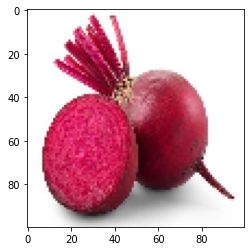

[[4.12701439e-07 6.67669025e-36 9.99623537e-01 7.48271950e-17
  1.37095197e-26 8.04727552e-12 1.44622042e-25 2.56302609e-25
  1.24012745e-09 1.06196069e-30 4.42112811e-21 2.88867749e-17
  5.52998221e-20 2.75310592e-32 4.36716720e-15 1.08427061e-14
  3.66056925e-25 7.57325506e-34 1.06876690e-17 4.58538141e-24
  1.93921146e-09 8.30578130e-38 2.47929482e-10 2.29724400e-26
  1.04317775e-23 2.19718805e-24 1.43933969e-04 3.80340564e-37
  2.32098231e-04 1.37182975e-35 5.39876146e-23 0.00000000e+00
  1.43492966e-22 1.88433169e-14 1.68729142e-10 1.55415350e-14]]
Actual: beetroot
Predicted: beetroot


In [ ]:
from keras_preprocessing import image
image_path="/content/beetroot.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: beetroot")
print("Predicted: "+classes[np.argmax(pred)])

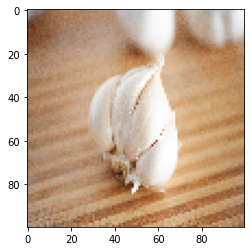

[[1.11311470e-04 2.79538799e-04 2.63981633e-06 6.80297418e-08
  3.36706444e-06 1.54324226e-07 7.48970433e-06 6.35507843e-03
  1.18724628e-07 1.30817440e-04 4.57004774e-07 4.98653862e-05
  8.83158445e-01 2.47073676e-02 5.71951296e-06 4.63697148e-07
  3.61520906e-05 1.29738200e-05 1.42770688e-07 4.93000198e-06
  6.72753081e-02 2.60068487e-06 2.33159135e-05 4.78159709e-05
  5.31807109e-06 1.00114612e-05 2.77034673e-07 7.85657298e-03
  3.41755978e-04 6.98597496e-03 2.23474004e-07 7.80147093e-06
  2.47360952e-03 7.00677774e-08 1.01906175e-04 4.61958081e-07]]
Actual: garlic
Predicted: garlic


In [ ]:
from keras_preprocessing import image
image_path="/content/garlic.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: garlic")
print("Predicted: "+classes[np.argmax(pred)])

In [ ]:
import pickle
infile = open('augmentation.pkl','rb')
model = pickle.load(infile)
infile.close()

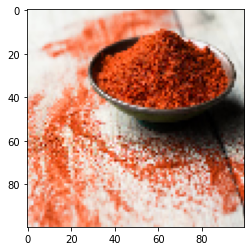

[[2.4070041e-03 2.9356399e-05 1.5093699e-04 1.2865422e-03 2.2417017e-10
  7.6674838e-03 1.9380705e-03 6.3840298e-06 4.4217005e-02 3.9696372e-03
  3.2455580e-07 2.6100064e-05 2.4564850e-05 2.9041711e-03 6.5394379e-06
  3.2814241e-03 1.2298392e-07 9.1941823e-05 1.7611107e-09 7.1190037e-03
  1.1989937e-01 1.3719498e-01 2.6132545e-01 3.1486830e-05 1.7867369e-09
  7.2030129e-04 2.3851180e-03 1.5856236e-01 6.4272137e-04 3.5583969e-05
  2.0835364e-08 4.4953215e-04 2.3456447e-01 9.0448139e-03 1.3831769e-05
  3.2861101e-06]]
Actual:paprika
Predicted: paprika


In [ ]:
from keras_preprocessing import image
image_path="/content/paprika.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual:paprika")
print("Predicted: "+classes[np.argmax(pred)])

In [ ]:
import pickle
infile = open('fruits_and_vegetables.pkl','rb')
model2 = pickle.load(infile)
infile.close()

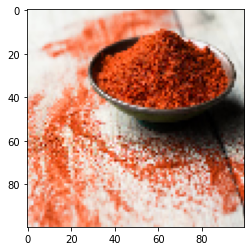

[[9.2332197e-10 2.3711528e-16 2.4463779e-06 1.5029869e-10 4.0226795e-09
  3.1310726e-02 4.2886018e-05 7.4686874e-08 1.1746114e-02 5.4447691e-10
  1.1416363e-06 6.7654465e-13 5.5315419e-11 2.0345965e-06 3.9007977e-12
  2.1616238e-06 1.8177379e-05 2.4072040e-11 7.1782456e-06 7.7260703e-10
  9.7649517e-03 9.4703758e-01 1.9490436e-09 3.4387965e-10 2.1056296e-06
  1.8194607e-10 6.5798602e-09 9.2298882e-07 5.9026628e-05 5.1774701e-10
  5.9624661e-08 1.6465986e-13 5.2471682e-07 1.4784439e-10 1.1367802e-09
  1.8671648e-06]]
Actual:paprika
Predicted: orange


In [ ]:
from keras_preprocessing import image
image_path="/content/paprika.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model2.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual:paprika")
print("Predicted: "+classes[np.argmax(pred)])

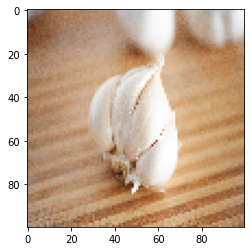

[[4.6353068e-09 4.0583900e-10 9.2841692e-06 2.0658739e-12 2.9150260e-06
  1.1488698e-08 4.5414620e-07 1.4100877e-06 4.3693287e-08 8.1811785e-10
  2.6825810e-06 7.1586990e-05 9.9969900e-01 1.1307439e-07 6.1150502e-08
  2.3716175e-06 1.9935010e-07 3.5313670e-07 5.9561218e-09 1.6512084e-07
  2.3994167e-07 1.4749193e-08 3.2529712e-09 4.1711976e-09 3.9534913e-09
  4.4598888e-10 4.6801013e-08 1.1306614e-08 1.9462181e-04 1.6262716e-08
  1.3423895e-11 4.1586325e-08 1.2136759e-07 1.2596334e-06 1.2991086e-05
  3.9155957e-08]]
Actual: garlic
Predicted: garlic


In [ ]:
from keras_preprocessing import image
image_path="/content/garlic.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model2.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: garlic")
print("Predicted: "+classes[np.argmax(pred)])

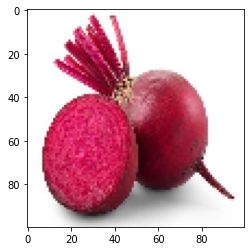

[[9.0690225e-01 5.2392455e-16 1.5644271e-04 2.9024281e-09 4.2683421e-08
  4.8999063e-05 7.9787208e-09 2.1220647e-13 6.8574576e-05 2.3341524e-08
  6.5482908e-08 3.0972453e-07 5.6716323e-02 1.9971488e-13 4.2941516e-13
  6.1144510e-06 9.8286734e-18 5.4459041e-13 8.3628977e-18 5.3038293e-11
  1.2745209e-06 2.5996905e-13 8.2106668e-09 1.6739736e-11 2.1753141e-14
  4.9807278e-15 5.5846276e-06 7.6881383e-12 2.2916847e-11 2.2640648e-08
  2.3278349e-19 4.6820881e-14 3.9872283e-13 3.2665220e-04 3.5766169e-02
  1.2367035e-06]]
Actual: beetroot
Predicted: apple


In [ ]:
from keras_preprocessing import image
image_path="/content/beetroot.jpg"
img = image.load_img(image_path, target_size=(100,100,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model2.predict(images, batch_size=32)
print(pred)
label = np.argmax(pred, axis=1)
print("Actual: beetroot")
print("Predicted: "+classes[np.argmax(pred)])